In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
state_job_fig = "CSV Files/Total Jobs per State"
total_ind_state = "CSV Files/Total Worker per Category"
state_ind_breakdown = "CSV Files/Manufacturing Jobs by Industry"
state_lab_force = "CSV Files/BLS Civilian Labor Force By State.csv"
combined_cancer = "Cancer Incidence & Death Rates/Resource/Added_final_combined_cancer_data.csv"

In [3]:
state_job_df = pd.read_csv(state_job_fig)
total_ind_df = pd.read_csv(total_ind_state)
st_in_brk_df = pd.read_csv(state_ind_breakdown)
state_lab_df = pd.read_csv(state_lab_force)
cancer_rate_df = pd.read_csv(combined_cancer)

In [4]:
job_lab_df = pd.merge(state_job_df,state_lab_df, on="State" )
job_lab_df.head()

,State,Workers per State,Civilia Labor Force,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Alabama,128315,"2,181,837",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,3239,"353,728",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,56602,"3,252,711",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,76421,"1,327,435",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,517711,"19,192,788",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
job_lab_df= job_lab_df.rename(columns={"Civilia Labor Force":"Labor Force"})

In [6]:
job_lab_df = job_lab_df.drop(columns=["Unnamed: 2","Unnamed: 3", "Unnamed: 4","Unnamed: 5","Unnamed: 6","Unnamed: 7","Unnamed: 8","Unnamed: 9"])

In [7]:
job_lab_df.dtypes

State                object
Workers per State     int64
Labor Force          object
dtype: object

In [8]:
job_lab_df["Labor Force"]
job_lab_df['Labor Force'] = [int(x.replace(',','')) for x in list(job_lab_df['Labor Force'])]


#job_lab_df["Labor Force"] = job_lab_df["Labor Force"].convert_objects(convert_numeric=True)


In [9]:
job_lab_df["Manufacturing Percentage"] = (job_lab_df["Workers per State"]  / job_lab_df['Labor Force']) *100
job_lab_df

,State,Workers per State,Labor Force,Manufacturing Percentage
0,Alabama,128315,2181837,5.881053
1,Alaska,3239,353728,0.915675
2,Arizona,56602,3252711,1.740148
3,Arkansas,76421,1327435,5.757043
4,California,517711,19192788,2.697425
5,Colorado,53580,2899662,1.847802
6,Connecticut,49562,1887269,2.626123
7,Delaware,15705,470075,3.340956
8,District of Columbia,840,397720,0.211204
9,Florida,153757,9922037,1.549652


In [10]:
state_job_ind = state_job_df.set_index("State")
state_job_ind.head()

,Workers per State
State,
Alabama,128315
Alaska,3239
Arizona,56602
Arkansas,76421
California,517711


Text(0.5, 0, 'Number of Manufacturing Employees')

<Figure size 432x288 with 0 Axes>

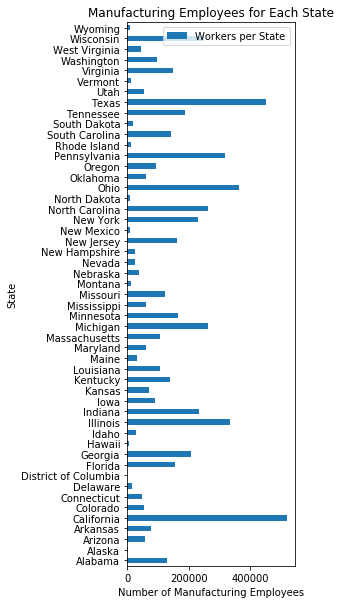

In [11]:
plt.figure()
state_job_ind.plot(kind = "barh",figsize=(3,10))

plt.title("Manufacturing Employees for Each State")
plt.ylabel("State")
plt.xlabel("Number of Manufacturing Employees")

In [12]:
total_job_total_cancer = pd.merge(state_job_df,cancer_rate_df, on='State')
total_job_total_cancer

,State,Workers per State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
0,Alabama,128315,451.9,26110.0,179.0,10332.0,39.571046
1,Alaska,3239,413.0,2784.0,164.9,977.0,35.093391
2,Arizona,56602,387.0,30448.0,144.1,11508.0,37.795586
3,Arkansas,76421,467.8,16551.0,185.2,6623.0,40.015709
4,California,517711,404.8,165242.0,145.3,58588.0,35.455877
5,Colorado,53580,401.4,22701.0,138.9,7520.0,33.126294
6,Connecticut,49562,472.4,20843.0,145.8,6657.0,31.938780
7,Delaware,15705,498.4,5803.0,169.6,1989.0,34.275375
8,District of Columbia,840,432.6,2818.0,169.0,1082.0,38.396026
9,Florida,153757,451.9,121916.0,152.6,43285.0,35.503954


In [13]:
total_job_total_cancer["Workforce Percentage"] = pd.Series(job_lab_df["Manufacturing Percentage"])
total_job_total_cancer

,State,Workers per State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient,Workforce Percentage
0,Alabama,128315,451.9,26110.0,179.0,10332.0,39.571046,5.881053
1,Alaska,3239,413.0,2784.0,164.9,977.0,35.093391,0.915675
2,Arizona,56602,387.0,30448.0,144.1,11508.0,37.795586,1.740148
3,Arkansas,76421,467.8,16551.0,185.2,6623.0,40.015709,5.757043
4,California,517711,404.8,165242.0,145.3,58588.0,35.455877,2.697425
5,Colorado,53580,401.4,22701.0,138.9,7520.0,33.126294,1.847802
6,Connecticut,49562,472.4,20843.0,145.8,6657.0,31.938780,2.626123
7,Delaware,15705,498.4,5803.0,169.6,1989.0,34.275375,3.340956
8,District of Columbia,840,432.6,2818.0,169.0,1082.0,38.396026,0.211204
9,Florida,153757,451.9,121916.0,152.6,43285.0,35.503954,1.549652


In [14]:
total_job_total_cancer = total_job_total_cancer[['State','Workers per State','Workforce Percentage','Incidence Rate','Average Annual Count_x','Death Rate','Cancer Death_per_hundred_cancer_patient']]
total_job_total_cancer

,State,Workers per State,Workforce Percentage,Incidence Rate,Average Annual Count_x,Death Rate,Cancer Death_per_hundred_cancer_patient
0,Alabama,128315,5.881053,451.9,26110.0,179.0,39.571046
1,Alaska,3239,0.915675,413.0,2784.0,164.9,35.093391
2,Arizona,56602,1.740148,387.0,30448.0,144.1,37.795586
3,Arkansas,76421,5.757043,467.8,16551.0,185.2,40.015709
4,California,517711,2.697425,404.8,165242.0,145.3,35.455877
5,Colorado,53580,1.847802,401.4,22701.0,138.9,33.126294
6,Connecticut,49562,2.626123,472.4,20843.0,145.8,31.938780
7,Delaware,15705,3.340956,498.4,5803.0,169.6,34.275375
8,District of Columbia,840,0.211204,432.6,2818.0,169.0,38.396026
9,Florida,153757,1.549652,451.9,121916.0,152.6,35.503954


Text(0.5, 0, 'Total Manufacturing Employees')

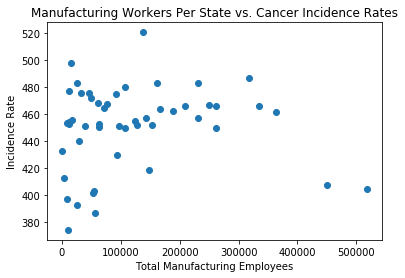

In [15]:
plt.figure()
plt.scatter(total_job_total_cancer["Workers per State"],total_job_total_cancer["Incidence Rate"])

plt.title("Manufacturing Workers Per State vs. Cancer Incidence Rates")
plt.ylabel("Incidence Rate")
plt.xlabel("Total Manufacturing Employees")

Text(0.5, 0, 'Manufacturing Workforce Percentage')

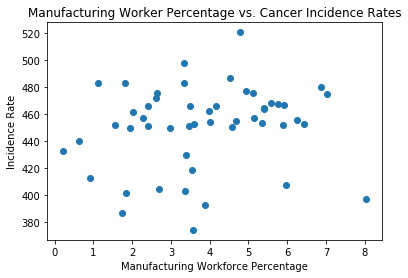

In [16]:
#Calculating Incidence Rates verse Workforce Percentage rather than total employment figures.
plt.figure()
plt.scatter(total_job_total_cancer["Workforce Percentage"],total_job_total_cancer["Incidence Rate"])

plt.title("Manufacturing Worker Percentage vs. Cancer Incidence Rates")
plt.ylabel("Incidence Rate")
plt.xlabel("Manufacturing Workforce Percentage")

In [17]:
#Determining the pearson correlation between percentage of workers in manufacturing and incidence rates.
x_axis= total_job_total_cancer["Workforce Percentage"]
y_axis= total_job_total_cancer["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between percentage of workers and Incidence Rate is {round(correlation[0],2)}")


The pearson correlation between percentage of workers and Incidence Rate is 0.16


Text(0.5, 0, 'Total Manufacturing Employees')

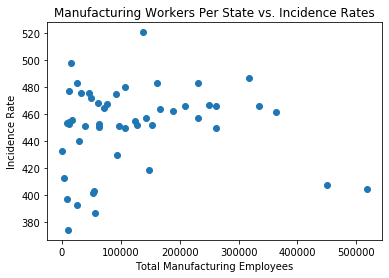

In [18]:
plt.figure()
plt.scatter(total_job_total_cancer["Workers per State"],total_job_total_cancer["Incidence Rate"])

plt.title("Manufacturing Workers Per State vs. Incidence Rates")
plt.ylabel("Incidence Rate")
plt.xlabel("Total Manufacturing Employees")

In [19]:
#Determining the pearson correlation between workes per state and cancer deaths per hunder cancer patients
x_axis= total_job_total_cancer["Workers per State"]
y_axis= total_job_total_cancer["Cancer Death_per_hundred_cancer_patient"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Workers per State and Cancer Death Rate is {round(correlation[0],2)}")


The pearson correlation between Workers per State and Cancer Death Rate is 0.01


In [20]:
#Determining the pearson correlation between workers per state and cancer incidence rates
x_axis= total_job_total_cancer["Workers per State"]
y_axis= total_job_total_cancer["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Workers per State and Cancer Indicence Rate is {round(correlation[0],2)}")



The pearson correlation between Workers per State and Cancer Indicence Rate is 0.06


In [21]:
#industries_states = st_in_brk_df.groupby(["State"])
st_in_brk_df.head()

,Job Category,People Employed,State,Year,NAICS Code
0,Basic chemical manufacturing,4474,New Jersey,2016,3251
1,Basic chemical manufacturing,7003,Ohio,2016,3251
2,Basic chemical manufacturing,4631,New York,2016,3251
3,Basic chemical manufacturing,820,New Mexico,2016,3251
4,Basic chemical manufacturing,2363,Missouri,2016,3251


In [22]:
# st_in_brk_df["Labor Force"] = pd.Series(job_lab_df["Labor Force"])
merged_data = pd.merge(st_in_brk_df,job_lab_df,on="State",how="left")
merged_data.head(60)

,Job Category,People Employed,State,Year,NAICS Code,Workers per State,Labor Force,Manufacturing Percentage
0,Basic chemical manufacturing,4474,New Jersey,2016,3251,161424,4515938,3.574540
1,Basic chemical manufacturing,7003,Ohio,2016,3251,364242,5673884,6.419624
2,Basic chemical manufacturing,4631,New York,2016,3251,230548,9539259,2.416833
3,Basic chemical manufacturing,820,New Mexico,2016,3251,10553,935358,1.128231
4,Basic chemical manufacturing,2363,Missouri,2016,3251,124148,3093755,4.012858
5,Basic chemical manufacturing,184,Maine,2016,3251,31611,690121,4.580501
6,Basic chemical manufacturing,1860,Kansas,2016,3251,70825,1482709,4.776730
7,Basic chemical manufacturing,1053,Oklahoma,2016,3251,62254,1835037,3.392520
8,Basic chemical manufacturing,3997,Iowa,2016,3251,91133,1690916,5.389564
9,Basic chemical manufacturing,684,Idaho,2016,3251,28172,805716,3.496517


In [23]:
st_in_brk_df = merged_data
st_in_brk_df["Manufacturing Percentage"] = (st_in_brk_df["People Employed"]  / st_in_brk_df['Labor Force']) *100
st_in_brk_df.tail(20)

,Job Category,People Employed,State,Year,NAICS Code,Workers per State,Labor Force,Manufacturing Percentage
1345,Wood product manufacturing,1738,New Hampshire,2016,321,24944,746996,0.232665
1346,Wood product manufacturing,923,Nevada,2016,321,25744,1427057,0.064679
1347,Wood product manufacturing,1782,Vermont,2016,321,12215,343843,0.518260
1348,Wood product manufacturing,2072,Nebraska,2016,321,39252,1008515,0.205451
1349,Wood product manufacturing,5744,Louisiana,2016,321,107111,2089577,0.274888
1350,Wood product manufacturing,4099,Maine,2016,321,31611,690121,0.593954
1351,Wood product manufacturing,2683,Maryland,2016,321,62157,3197318,0.083914
1352,Wood product manufacturing,1835,Massachusetts,2016,321,107215,3587944,0.051143
1353,Wood product manufacturing,10214,Michigan,2016,321,260972,4831428,0.211407
1354,Wood product manufacturing,12897,Minnesota,2016,321,166155,2977719,0.433117


In [24]:
#st_in_brk_df = st_in_brk_df[['Job Category','People Employed','Manufacturing Percentage','State','Year','NAICS Code','Labor Force']


In [25]:
#Creating a dataframe that lists job figures of petrolium and coal manufacturing jobs per state

#petro_coal_manu = st_in_brk_df.loc[st_in_brk_df["Job Category"]=="Petroleum and coal products manufacturing"]

#petro_coal_manu

petro_coal_manu = st_in_brk_df.loc[st_in_brk_df["NAICS Code"]==3241]

#petro_coal_manu.sort_values("State", ascending = True)

In [26]:
pc_cancer = pd.merge(petro_coal_manu,cancer_rate_df, on="State" )


Text(0.5, 0, 'Total Petroleum & Coal Employees')

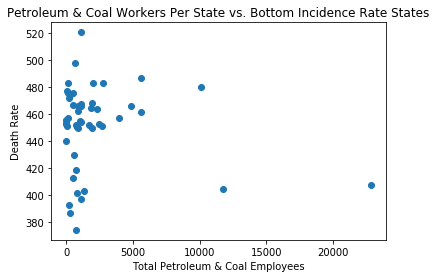

In [27]:
#figure of coal and petroleum workers compared in cancer rate deaths
plt.figure()
plt.scatter(pc_cancer["People Employed"],pc_cancer["Incidence Rate"])

plt.title("Petroleum & Coal Workers Per State vs. Bottom Incidence Rate States")
plt.ylabel("Death Rate")
plt.xlabel("Total Petroleum & Coal Employees")

In [28]:
x_axis= pc_cancer["People Employed"]
y_axis= pc_cancer["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Coal & Petroleum Workers per State and Incidence Rate is {round(correlation[0],2)}")

The pearson correlation between Coal & Petroleum Workers per State and Incidence Rate is -0.14


In [29]:
#Creating a dataframe that lists job figures of chemical manufacturing jobs per state

chemical_manu = st_in_brk_df.loc[st_in_brk_df["Job Category"]=="Chemical manufacturing"]


In [30]:
#Merging chemical manufacturing job dataframe with the cancer information dataframe.
chem_cancer = pd.merge(chemical_manu,cancer_rate_df, on="State" )
chem_cancer

,Job Category,People Employed,State,Year,NAICS Code,Workers per State,Labor Force,Manufacturing Percentage,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
0,Chemical manufacturing,4185,Oregon,2016,325,92974,2053854,0.203763,429.8,20790.0,162.8,7933.0,38.157768
1,Chemical manufacturing,20118,Georgia,2016,325,208481,4993511,0.402883,466.4,49003.0,165.6,16650.0,33.977512
2,Chemical manufacturing,20697,Indiana,2016,325,231759,3295293,0.628078,457.1,34242.0,178.4,13416.0,39.179954
3,Chemical manufacturing,20305,South Carolina,2016,325,143099,2289830,0.886747,457.3,26730.0,171.8,9942.0,37.194164
4,Chemical manufacturing,21011,Louisiana,2016,325,107111,2089577,1.005515,480.6,24888.0,183.0,9346.0,37.552234
5,Chemical manufacturing,11,District of Columbia,2016,325,840,397720,0.002766,432.6,2818.0,169.0,1082.0,38.396026
6,Chemical manufacturing,4255,Delaware,2016,325,15705,470075,0.905175,498.4,5803.0,169.6,1989.0,34.275375
7,Chemical manufacturing,6951,Connecticut,2016,325,49562,1887269,0.368310,472.4,20843.0,145.8,6657.0,31.938780
8,Chemical manufacturing,15439,Massachusetts,2016,325,107215,3587944,0.430302,449.7,36149.0,155.8,12795.0,35.395170
9,Chemical manufacturing,5141,Arkansas,2016,325,76421,1327435,0.387288,467.8,16551.0,185.2,6623.0,40.015709


Text(0.5, 0, 'Total Chemical Manufacture Employees')

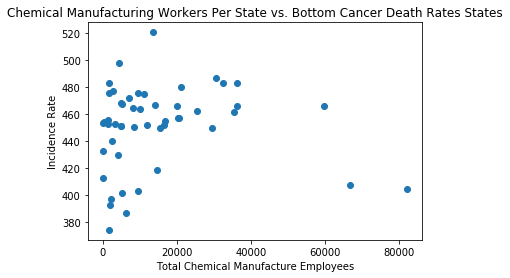

In [31]:
#figure of chemical manufacturer workers compared to incidence rates
plt.figure()
plt.scatter(chem_cancer["People Employed"],chem_cancer["Incidence Rate"])

plt.title("Chemical Manufacturing Workers Per State vs. Bottom Cancer Death Rates States")
plt.ylabel("Incidence Rate")
plt.xlabel("Total Chemical Manufacture Employees")

In [32]:
#Figuring out the pearson correlation
x_axis= chem_cancer["People Employed"]
y_axis= chem_cancer["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Chemical Manufacturing Workers per State and Incidence Rates is {round(correlation[0],2)}")

The pearson correlation between Chemical Manufacturing Workers per State and Incidence Rates is 0.01


In [33]:
#Do comparisons with top 10 bottom 20 and industries. Done. That's below.
#See about comparing specific industries.

In [34]:
#Creating a dataframe that has the lowest deaths per 100 cancer patients.
dx = cancer_rate_df.sort_values("Cancer Death_per_hundred_cancer_patient", ascending = True)
low_can_death = dx.head(10)
low_can_death

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
44,Utah,402.8,10143.0,127.0,3021.0,29.784088
5,New York,482.9,111527.0,151.0,35491.0,31.822787
11,Connecticut,472.4,20843.0,145.8,6657.0,31.938780
4,New Jersey,483.3,50921.0,153.5,16407.0,32.220498
45,Colorado,401.4,22701.0,138.9,7520.0,33.126294
19,Minnesota,463.8,28996.0,153.4,9691.0,33.421851
3,New Hampshire,483.5,8129.0,162.0,2718.0,33.435847
15,Georgia,466.4,49003.0,165.6,16650.0,33.977512
33,Washington,451.0,35813.0,157.1,12273.0,34.269679
1,Delaware,498.4,5803.0,169.6,1989.0,34.275375


In [35]:
bot_can_death = pd.merge(state_job_df,low_can_death, on ='State')
bot_can_death = bot_can_death.sort_values("Cancer Death_per_hundred_cancer_patient", ascending=True)
bot_can_death

,State,Workers per State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
8,Utah,54867,402.8,10143.0,127.0,3021.0,29.784088
7,New York,230548,482.9,111527.0,151.0,35491.0,31.822787
1,Connecticut,49562,472.4,20843.0,145.8,6657.0,31.938780
6,New Jersey,161424,483.3,50921.0,153.5,16407.0,32.220498
0,Colorado,53580,401.4,22701.0,138.9,7520.0,33.126294
4,Minnesota,166155,463.8,28996.0,153.4,9691.0,33.421851
5,New Hampshire,24944,483.5,8129.0,162.0,2718.0,33.435847
3,Georgia,208481,466.4,49003.0,165.6,16650.0,33.977512
9,Washington,97028,451.0,35813.0,157.1,12273.0,34.269679
2,Delaware,15705,498.4,5803.0,169.6,1989.0,34.275375


Text(0.5, 0, 'Total Manufacturing Employees')

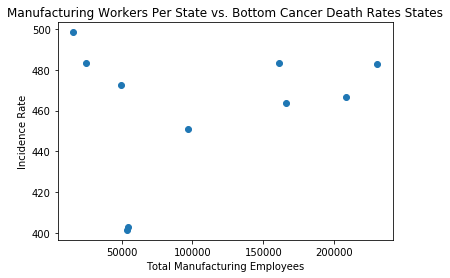

In [36]:
#Making a plot for the number of manufacturing workers verse cancer deaths.
plt.figure()
plt.scatter(bot_can_death["Workers per State"],bot_can_death["Incidence Rate"])

plt.title("Manufacturing Workers Per State vs. Bottom Cancer Death Rates States")
plt.ylabel("Incidence Rate")
plt.xlabel("Total Manufacturing Employees")

In [37]:
#Calculating the pearson correlation between workers pers state and cancer death rates in the bottom 10 states.

x_axis= bot_can_death["Workers per State"]
y_axis= bot_can_death["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Workers per State and Incidence Rates is {round(correlation[0],2)}")

The pearson correlation between Workers per State and Incidence Rates is 0.21


In [38]:
dx2 = dx.tail(20)

In [39]:
#Creating a dataframe that has the 20 states with the highest death per 100 patients
high_can_death = dx2.sort_values("Cancer Death_per_hundred_cancer_patient", ascending = False)
high_can_death

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
12,Mississippi,468.6,15923.0,193.6,6522.0,40.959618
8,West Virginia,476.0,11653.0,189.4,4756.0,40.813524
28,Oklahoma,452.9,19837.0,183.7,8082.0,40.742048
13,Arkansas,467.8,16551.0,185.2,6623.0,40.015709
47,Nevada,392.6,12409.0,162.3,4934.0,39.761463
30,Alabama,451.9,26110.0,179.0,10332.0,39.571046
20,Tennessee,462.6,35692.0,184.0,14111.0,39.535470
25,Missouri,455.2,32947.0,175.6,12920.0,39.214496
23,Indiana,457.1,34242.0,178.4,13416.0,39.179954
21,Ohio,461.9,64858.0,177.1,25317.0,39.034506


In [40]:
state_job_df.head()

,State,Workers per State
0,Alabama,128315
1,Alaska,3239
2,Arizona,56602
3,Arkansas,76421
4,California,517711


In [41]:
#combining the highest cancer death states with the total industry figures
top_can_ind = pd.merge(state_job_df, high_can_death, on= "State")
top_can_ind = top_can_ind.sort_values("Cancer Death_per_hundred_cancer_patient", ascending = False)
top_can_ind

,State,Workers per State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
9,Mississippi,60455,468.6,15923.0,193.6,6522.0,40.959618
19,West Virginia,45957,476.0,11653.0,189.4,4756.0,40.813524
14,Oklahoma,62254,452.9,19837.0,183.7,8082.0,40.742048
2,Arkansas,76421,467.8,16551.0,185.2,6623.0,40.015709
11,Nevada,25744,392.6,12409.0,162.3,4934.0,39.761463
0,Alabama,128315,451.9,26110.0,179.0,10332.0,39.571046
17,Tennessee,188053,462.6,35692.0,184.0,14111.0,39.535470
10,Missouri,124148,455.2,32947.0,175.6,12920.0,39.214496
4,Indiana,231759,457.1,34242.0,178.4,13416.0,39.179954
13,Ohio,364242,461.9,64858.0,177.1,25317.0,39.034506


Text(0.5, 0, 'Total Manufacturing Employees')

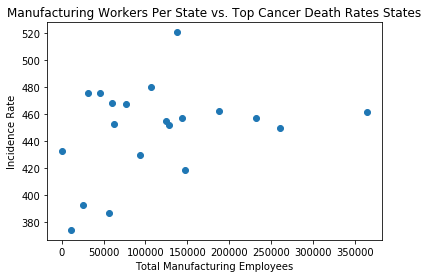

In [42]:
plt.figure()
plt.scatter(top_can_ind["Workers per State"],top_can_ind["Incidence Rate"])

plt.title("Manufacturing Workers Per State vs. Top Cancer Death Rates States")
plt.ylabel("Incidence Rate")
plt.xlabel("Total Manufacturing Employees")

In [43]:
#Calculating the pearson correlation between workers pers state and cancer death rates in the top 20 states.

x_axis= top_can_ind["Workers per State"]
y_axis= top_can_ind["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Workers per State and Cancer Death Rate is {round(correlation[0],2)}")

The pearson correlation between Workers per State and Cancer Death Rate is 0.31


In [44]:
#combining the highest cancer death states with the total petroleum & coal manufacturing industry figures industry figures

top_pc_death = pd.merge(petro_coal_manu, high_can_death, on= "State")
top_pc_death = top_pc_death.sort_values("Cancer Death_per_hundred_cancer_patient", ascending = False)
top_pc_death

,Job Category,People Employed,State,Year,NAICS Code,Workers per State,Labor Force,Manufacturing Percentage,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
13,Petroleum and coal products manufacturing,1963,Mississippi,2016,3241,60455,1290731,0.152084,468.6,15923.0,193.6,6522.0,40.959618
15,Petroleum and coal products manufacturing,519,West Virginia,2016,3241,45957,775724,0.066905,476.0,11653.0,189.4,4756.0,40.813524
5,Petroleum and coal products manufacturing,2461,Oklahoma,2016,3241,62254,1835037,0.134112,452.9,19837.0,183.7,8082.0,40.742048
9,Petroleum and coal products manufacturing,1137,Arkansas,2016,3241,76421,1327435,0.085654,467.8,16551.0,185.2,6623.0,40.015709
18,Petroleum and coal products manufacturing,175,Nevada,2016,3241,25744,1427057,0.012263,392.6,12409.0,162.3,4934.0,39.761463
8,Petroleum and coal products manufacturing,1733,Alabama,2016,3241,128315,2181837,0.079428,451.9,26110.0,179.0,10332.0,39.571046
7,Petroleum and coal products manufacturing,917,Tennessee,2016,3241,188053,3156375,0.029052,462.6,35692.0,184.0,14111.0,39.535470
0,Petroleum and coal products manufacturing,1016,Missouri,2016,3241,124148,3093755,0.032840,455.2,32947.0,175.6,12920.0,39.214496
10,Petroleum and coal products manufacturing,3953,Indiana,2016,3241,231759,3295293,0.119959,457.1,34242.0,178.4,13416.0,39.179954
16,Petroleum and coal products manufacturing,5577,Ohio,2016,3241,364242,5673884,0.098292,461.9,64858.0,177.1,25317.0,39.034506


Text(0.5, 0, 'Total Coal & Petroleum Manufacturing Employees')

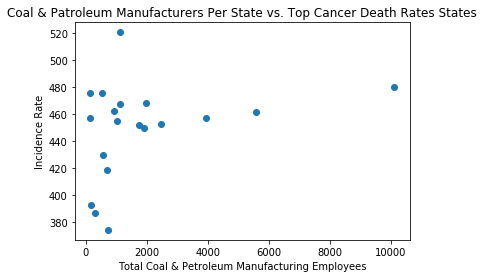

In [45]:
plt.figure()
plt.scatter(top_pc_death["People Employed"],top_pc_death["Incidence Rate"])

plt.title("Coal & Patroleum Manufacturers Per State vs. Top Cancer Death Rates States")
plt.ylabel("Incidence Rate")
plt.xlabel("Total Coal & Petroleum Manufacturing Employees")